In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.io
from scipy.io import loadmat
import scipy.optimize

#### Data

In [2]:
mat = loadmat('digits.mat')
X = mat['X']
y = mat['y']
label = [1,2,3,4,5,6,7,8,9,10]

print("Y shape: {}".format(y.shape))
print("Class labels: {0}".format(label))
print("X shape: {0}. X[0]shape: {1}".format(X.shape, X.shape[1]))

#Convert 2D matrix to 1D array. Thanks to the squeeze function.
y = np.squeeze(mat['y'])
#Because of array indexing issues in Matlab. We are replacing the label 10 with 0.
np.place(y, y == 10, 0)

Y shape: (5000, 1)
Class labels: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
X shape: (5000, 400). X[0]shape: 400


#### Data visualization

In [3]:
def displayData():
    #Random digit image
    rdi = X[random.randint(0,len(X))]
    rdis = rdi.reshape(20,20) #random digit image shaped
    plt.imshow(rdis)

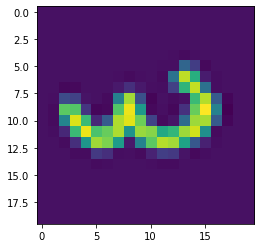

In [4]:
displayData()

#### Hypothesis and cost fucntions

In [5]:
def hypothesis(X, theta):
    return np.dot(X, theta)

"""
If the output is 0.5, both classes are equally probable as far as the classifier is concerned.
If the output is 1, the classifier is 100% confident about class 1.
If the output is 0, the classifier is 100% confident about class 0.
"""
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Cost Function
def costF(theta, X, y):
    predictions = sigmoid(hypothesis(X, theta))
    #if log(1)=0, it will cause a division error
    predictions[predictions == 1] = 0.999 
    error = (-y * np.log(predictions )) - ((1-y)*np.log(1-predictions ))
    return sum(error) / len(y);

#### Gradient descent algorithm

In [6]:
def Gradient(theta, X, y):
    predictions = sigmoid(hypothesis(X, theta))
    return np.dot(X.transpose(),(predictions - y)) / len(y)

#### One vs all classification

In [7]:
x = np.ones(shape=(X.shape[0], X.shape[1] + 1)) 
x[:, 1 :] = X

#We need 10 sets of model parameters, each consisting of 401 parameters including the intercept term
sorter = np.zeros(shape=(len(label), x.shape[1]))

for i in range(len(label)):
    sticker = (y==i).astype(int) #sticker vector in each iteration
    theta = np.zeros(x.shape[1])
    sorter[i,:] = scipy.optimize.fmin_cg(costF, theta, Gradient, (x, sticker), disp=0)
    
#This gives us a matrix of 5000 rows and 10 columns.
#Each column corresponds to the class probability estimates for all images.
CP = sigmoid(hypothesis(x, sorter.transpose()))#Class Probabilities

predictions = CP.argmax(axis=1) #select the sticker with the highest probability in each row

#### Calculate accuracy

In [8]:
print("Accuracy:{0}%".format(np.mean(predictions == y)*100))

Accuracy:98.16%
